In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,4)

In [2]:
!head ./Board/board_data.txt

-0.9741,-0.5889,3.0000
0.9959,-0.7082,2.0000
0.7020,0.7082,3.0000
0.8805,-0.7997,2.0000
-0.1456,-0.2302,3.0000
-0.0444,0.2458,3.0000
-0.5426,0.4300,1.0000
0.4159,-0.0554,0.0000
-0.8899,0.8105,0.0000
-0.3338,-0.4920,3.0000


In [3]:
!head ./Board/board_data_overlap_1.txt

-0.9741,-0.5889,3.0000
0.9959,-0.7082,2.0000
0.7020,0.7082,3.0000
0.8805,-0.7997,2.0000
-0.1456,-0.2302,3.0000
-0.0444,0.2458,3.0000
-0.5426,0.4300,1.0000
0.4159,-0.0554,0.0000
-0.8899,0.8105,0.0000
-0.3338,-0.4920,3.0000


### Description about Dataset
Synthetic dataset: 4-class Classification problem in 2D feature space
The data files are in the directory Board and they are in the simple csv format <br/>
The dataset contains 8000 samples where each sample is having dimension 2.
<br/>
<br/>
The file **board_data.txt** contains non-overlapping classes, whereas **board_data_overlap_1.txt** and
**board_data_overlap_2.txt** contains overlapping classes due to some noise added. <br/> You need to
learn classifiers for each of the three data sets. $\textbf{The data is not split into training and test sets here.}$
You need to use an appropriate method to evaluate your learnt model.
Explore multilayer feedforward networks and SVM for this problem.


(8000, 2)
(8000,)


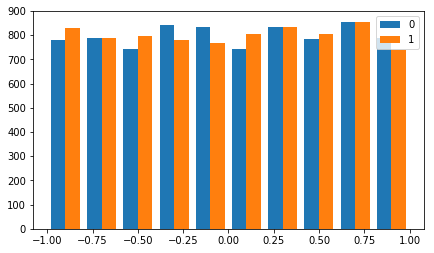

In [4]:
## Question
train = pd.read_csv('./Board/board_data_overlap_2.txt',skiprows=0, header=None)
#print(train.head)

X_train = train.values[:,0:-1]
y_train = train.values[:,-1]
print(X_train.shape)
print(y_train.shape)

N = len(X_train)
d = X_train.shape[1] 

mu = np.average(X_train)
var = np.var(X_train)
sig = np.sqrt(var)

plt.figure
plt.hist(X_train)
plt.legend(range(d))

X = X_train
y = y_train

## Plotting 

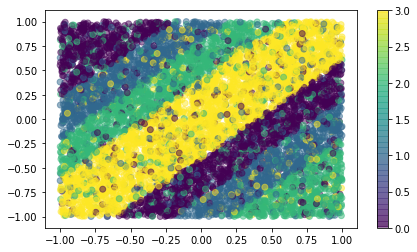

In [5]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:], alpha =0.5 )
plt.colorbar()

# Sk-learn

## SVM

In [49]:
## LOW OVERLAP DATASET

data = pd.read_csv('./Board/board_data_overlap_1.txt',skiprows=0, header=None)
#print(train.head)

X = data.values[:,0:-1]
y = data.values[:,-1]

## Train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False)
y_train = y_train.astype('int16')
y_test = y_test.astype('int16')

# train SVM 
from sklearn import svm
# SVC and nu-SVC implements "one against rest"
clf = svm.SVC(decision_function_shape='ovo',
              kernel='rbf', verbose=True, C=1e2,
             max_iter=1e5)

clf.fit(X_train, y_train)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))

[LibSVM]Train accuracy : 0.93109375
Test accuracy : 0.93125


In [10]:
## HIGH OVERLAP DATASET

data = pd.read_csv('./Board/board_data_overlap_2.txt',skiprows=0, header=None)
#print(train.head)

X = data.values[:,0:-1]
y = data.values[:,-1]

## Train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False)
y_train = y_train.astype('int16')
y_test = y_test.astype('int16')

# train SVM 
from sklearn import svm
# SVC and nu-SVC implements "one against rest"
clf = svm.SVC(decision_function_shape='ovo',
              kernel='rbf', verbose=True, C=1e5,
             max_iter=1e6)

clf.fit(X_train, y_train)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))

[LibSVM]

/home/scl2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Train accuracy : 0.77234375
Test accuracy : 0.799375


## Multilayer Feedforward Network

In [13]:
from sklearn.neural_network import MLPClassifier

In [54]:
## LOW OVERLAP DATASET

data = pd.read_csv('./Board/board_data_overlap_1.txt',skiprows=0, header=None)
#print(train.head)

X = data.values[:,0:-1]
y = data.values[:,-1]

## Train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False)
y_train = y_train.astype('int16')
y_test = y_test.astype('int16')

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,50,20),
                   activation='relu', learning_rate_init=1e-3, max_iter=1000, tol=1e-5,
                   momentum=0.9, random_state=1, shuffle=True)

clf.fit(X_train, y_train)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))

Train accuracy : 0.93828125
Test accuracy : 0.94125


In [55]:
## HIGH OVERLAP DATASET

data = pd.read_csv('./Board/board_data_overlap_2.txt',skiprows=0, header=None)
#print(train.head)

X = data.values[:,0:-1]
y = data.values[:,-1]

## Train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False)
y_train = y_train.astype('int16')
y_test = y_test.astype('int16')

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,50,20),
                   activation='relu', learning_rate_init=1e-2, max_iter=1000, tol=1e-5,
                   momentum=0.9, random_state=1, shuffle=True)

clf.fit(X_train, y_train)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))


Train accuracy : 0.83421875
Test accuracy : 0.843125
